In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KN
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.tree import DecisionTreeClassifier as DTC
from astroML.classification import GMMBayes as GMMB

from astroML.utils import split_samples
from astroML.utils import completeness_contamination

from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

import corner

In [2]:
#loading data

data=pd.read_csv('galaxyquasar.csv')

#defining colors

ug=np.array(data['u']-data['g'])
gr=np.array(data['g']-data['r'])
ri=np.array(data['r']-data['i'])
iz=np.array(data['i']-data['z'])
X=np.column_stack((ug,gr,ri,iz))

#fiding labels 

labels=data['class']
y=np.where(np.array(labels)=='QSO',1,0)

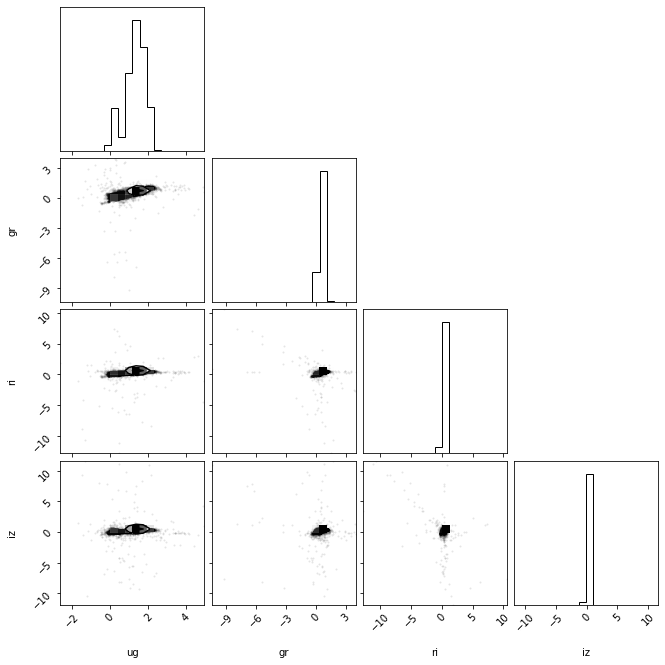

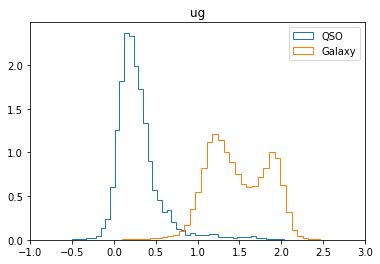

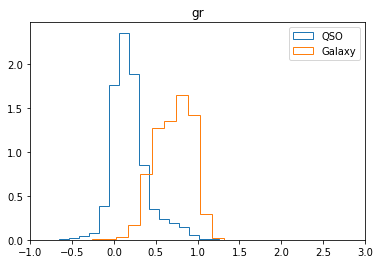

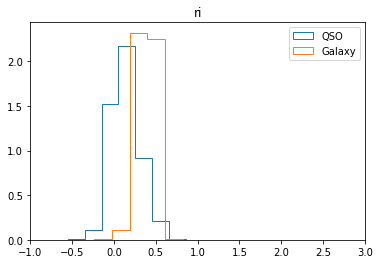

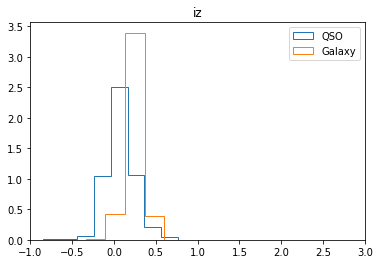

In [10]:
#looking at the data using a corner plot

corner.corner(X,labels=['ug','gr','ri','iz'])
plt.show()

#looking at them singularly

for i,color in zip(range(X.shape[1]),['ug','gr','ri','iz']):
    plt.hist(X[:,i][labels=='QSO'],bins=100,histtype='step',density=True,label='QSO');
    plt.hist(X[:,i][labels=='GALAXY'],bins=100,histtype='step',density=True,label='Galaxy');
    plt.legend()
    plt.title(color)
    plt.xlim(-1,3)
    plt.show()

The bimodality can be seen particularly well in the ug and gr colors

In [4]:
#classifiers that I'll use

Classifiers=[
    LDA(),
    QDA(),
    GNB(),
    KN(),
    DTC(random_state=42, max_depth=5,criterion='entropy'),
    GMMB(n_components=2, tol=1E-5,covariance_type='full')]

LinearDiscrimin

ug

completeness = 0.9297052154195011
contamination = 0.06446092413006276


gr

completeness = 0.5844671201814059
contamination = 0.11120689655172414


ri

completeness = 0.08843537414965986
contamination = 0.14754098360655737


iz

completeness = 0.003401360544217687
contamination = 0.8571428571428571




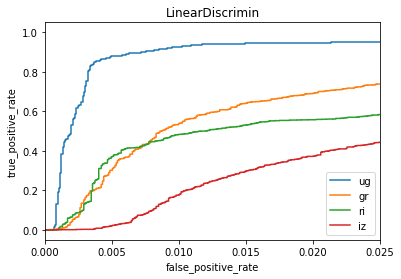

------------------------------
QuadraticDiscri

ug

completeness = 0.927437641723356
contamination = 0.06300114547537228


gr

completeness = 0.5827664399092971
contamination = 0.10841283607979185


ri

completeness = 0.14512471655328799
contamination = 0.14093959731543623


iz

completeness = 0.00510204081632653
contamination = 0.8269230769230769




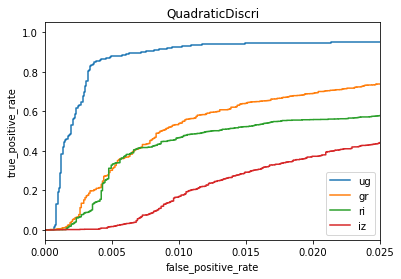

------------------------------
GaussianNB()

ug

completeness = 0.927437641723356
contamination = 0.06300114547537228


gr

completeness = 0.5827664399092971
contamination = 0.10841283607979185


ri

completeness = 0.14512471655328799
contamination = 0.14093959731543623


iz

completeness = 0.00510204081632653
contamination = 0.8269230769230769




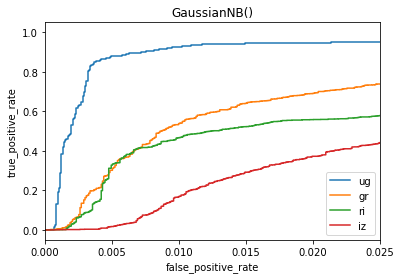

------------------------------
KNeighborsClass

ug

completeness = 0.9206349206349206
contamination = 0.06505469199769717


gr

completeness = 0.7114512471655329
contamination = 0.18134377038486627


ri

completeness = 0.576530612244898
contamination = 0.24330357142857142


iz

completeness = 0.4767573696145125
contamination = 0.3535741737125288




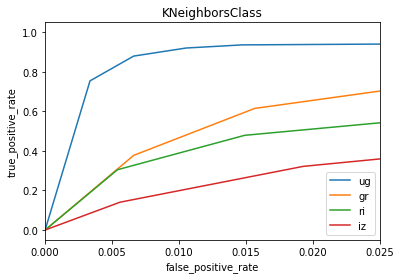

------------------------------
DecisionTreeCla

ug

completeness = 0.9359410430839002
contamination = 0.0672316384180791


gr

completeness = 0.7142857142857143
contamination = 0.1611185086551265


ri

completeness = 0.5629251700680272
contamination = 0.18472906403940886


iz

completeness = 0.5249433106575964
contamination = 0.2731554160125589




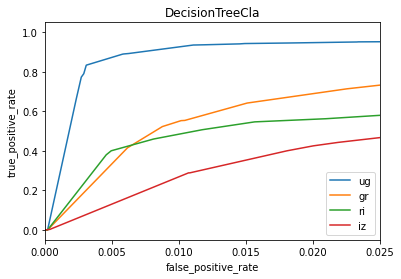

------------------------------
GMMBayes(n_comp

ug

completeness = 0.8917233560090703
contamination = 0.04376899696048632


gr

completeness = 0.7352607709750567
contamination = 0.16912235746316465


ri

completeness = 0.6145124716553289
contamination = 0.2435450104675506


iz

completeness = 0.5085034013605442
contamination = 0.2677551020408163




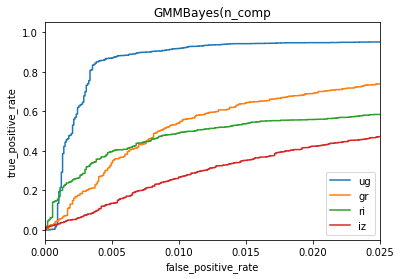

------------------------------


In [5]:
colors=[ug,gr,ri,iz]

for classifier in Classifiers:
    
    print(str(classifier)[:15]+'\n')
    
    for color,title in zip(colors,['ug','gr','ri','iz']):
        
        
        
        (X_train, X_test),(y_train, y_test)= split_samples(color[:,None], y, [0.75, 0.25],random_state=0)
        
        #fitting
        clf=classifier
        clf.fit(X_train[:], y_train)
        
        #computing probabilities and predicting
        
        y_probs_clf = clf.predict_proba(X_test[:])[:, 1]
        y_pred = clf.predict(X_test[:])
        
        #computing completness and contamination
        
        completeness, contamination = completeness_contamination(y_pred, y_test)
        efficiency=1-completeness
        
        print(title+'\n')
        print('completeness =',completeness)
        print('contamination =', contamination)
        print('\n')
        
        #computing the true and false positive rates
        
        false_positive_rate, true_positive_rate, thresh = roc_curve(y_test, y_probs_clf)
        
        #plotting ROC curves
        
        plt.plot(false_positive_rate,true_positive_rate,label=title)
        plt.xlim(0, 0.025)
        plt.xlabel('false_positive_rate')
        plt.ylabel('true_positive_rate')
        plt.title(str(classifier)[:15])
        plt.legend()
    plt.show()
    print('------------------------------')

In [6]:
#Trying classifiers with all data at once

#splitting the dataset in a train and validation set

(X_train, X_test),(y_train, y_test)= split_samples(X, y, [0.75, 0.25],random_state=0)

LinearDiscriminantAnalysis()


completeness = 0.9285714285714286
contamination = 0.05862068965517241


---------------------------------
QuadraticDiscriminantAnalysis()


completeness = 0.9257369614512472
contamination = 0.06632361349342482


---------------------------------
GaussianNB()


completeness = 0.9160997732426304
contamination = 0.11159978009895546


---------------------------------
KNeighborsClassifier()


completeness = 0.937641723356009
contamination = 0.03837209302325582


---------------------------------
DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)


completeness = 0.9365079365079365
contamination = 0.047838616714697406


---------------------------------
GMMBayes(n_components=array([2]))


completeness = 0.9302721088435374
contamination = 0.07025495750708215


---------------------------------


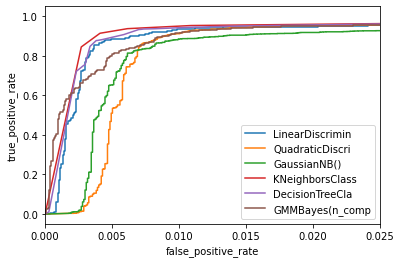

In [7]:
for classifier in Classifiers:
    
    #fitting
    clf=classifier
    clf.fit(X_train[:], y_train)
    
    #computing probabilities and predicting
    
    y_probs_clf = clf.predict_proba(X_test[:])[:, 1]
    y_pred = clf.predict(X_test[:])
    
    #computing completness and contamination
    
    completeness, contamination = completeness_contamination(y_pred, y_test)
    efficiency=1-completeness
    
    #printing results
    
    print(str(classifier))
    
    print('\n')
    print('completeness =',completeness)
    print('contamination =', contamination)
    print('\n')
    print('---------------------------------')
    
    #computing the true and false positive rates
    
    false_positive_rate, true_positive_rate, thresh = roc_curve(y_test, y_probs_clf)
    
    #plotting ROC curves
    
    plt.plot(false_positive_rate,true_positive_rate,label=str(classifier)[:15])
    plt.xlim(0, 0.025)
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.legend()
    
